# Classical Computation on a Quantum Computer

## Solutions  
## Quick Exercises

In [1]:
from qiskit import Aer, execute, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector,plot_histogram

In [2]:
input_bit = QuantumRegister(1,'input')
output_bit = QuantumRegister(1,'output')
garbage_bit = QuantumRegister(1,'garbage')

Uf = QuantumCircuit(input_bit,output_bit,garbage_bit)
Uf.cx(input_bit,output_bit)
# Uf.draw('mpl',justify=None)

In [3]:
Vf = QuantumCircuit(input_bit,output_bit,garbage_bit)
Vf.cx(input_bit,garbage_bit)
Vf.cx(input_bit,output_bit)
# Vf.draw('mpl',justify=None)

In [4]:
qc = Uf + Vf.inverse()
# qc.draw('mpl')

In [5]:
final_output_bit = QuantumRegister(1,'final_output')

In [6]:
copy = QuantumCircuit(output_bit,final_output_bit)
copy.cx(output_bit,final_output_bit)

# copy.draw('mpl',justify='None')

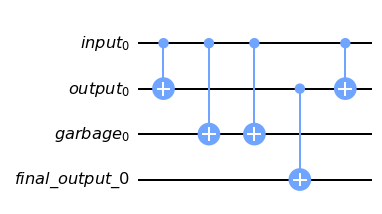

In [7]:
(Vf.inverse() + copy + Vf).draw(output='mpl',justify='None')

#### 1. Show that the output is correctly written to the 'final output' register (and only to this register) when the 'output' register is initialized as $|0\rangle$.  

$Solution:$  
With input = 0, final_output = 0. With input = 1, final_output = 1.  
We create the quantum circuit `qc` as containing the 4 registers - `input_bit`, `output_bit`, `garbage_bit` and `final_output_bit`. The circuit consists of the following operations: `Uf`, `Vf.inverse()`, `copy`, `Vf`.

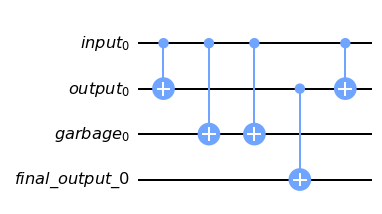

In [8]:
qc0 = QuantumCircuit(input_bit,output_bit,garbage_bit,final_output_bit)
qc0 = qc0 + Vf.inverse() + copy + Vf

qc0.draw('mpl',justify='none')

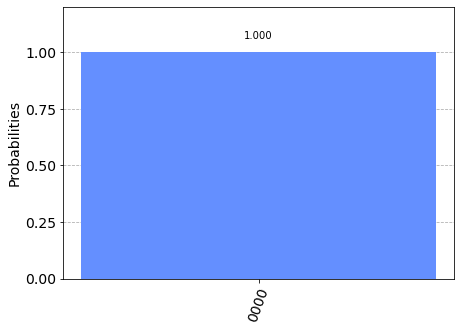

In [9]:
qasm_sim = Aer.get_backend('qasm_simulator')
qc0.measure_all()
result = execute(qc0,backend=qasm_sim).result()
counts = result.get_counts()
plot_histogram(counts)

The circuit gives the desired output for the input $0$. Next we check for input $1$.

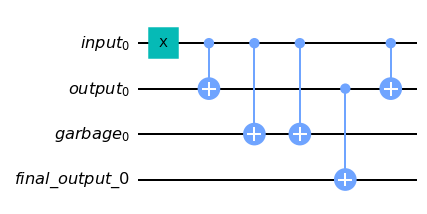

In [10]:
qc1 = QuantumCircuit(input_bit,output_bit,garbage_bit,final_output_bit)
qc1.x(0)
qc1 = qc1 + Vf.inverse() + copy + Vf

qc1.draw('mpl',justify='none')

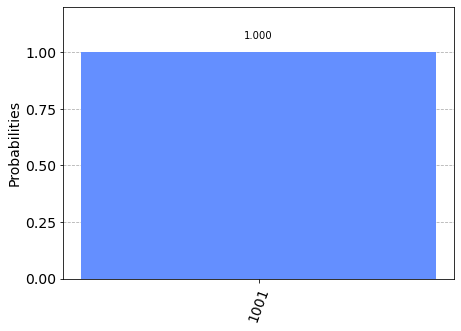

In [11]:
qc1.measure_all()
result = execute(qc1,backend=qasm_sim).result()
counts = result.get_counts()
plot_histogram(counts)

The output and garbage bits are 0, and the final_output bit contains the required output $f(x)$.  

#### 2. Determine what happens when the 'output' register is initialized as $|1\rangle$.  
$Solution: $

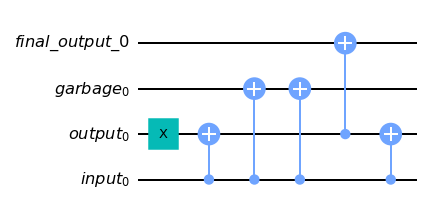

In [12]:
qc = QuantumCircuit(input_bit,output_bit,garbage_bit,final_output_bit)
qc.x(1)
qc = qc + Vf.inverse() + copy + Vf
qc = qc.reverse_bits()

qc.draw('mpl',justify='none')

In the circuit above, if we track the changes that occur along the circuit, we can see that if the output qubit is initialized as $|1\rangle$, the final_output bit will contain the opposite of the desired output.  

When $x = 0$,  
$|0,1,0,0\rangle \rightarrow |0,1,0,0\rangle \rightarrow |0,1,0,0\rangle \rightarrow |0,1,0,0\rangle \rightarrow |0,1,0,1\rangle \rightarrow |0,1,0,1\rangle$  

When $x = 1$,  
$|1,1,0,0\rangle \rightarrow |1,0,0,0\rangle \rightarrow |1,0,1,0\rangle \rightarrow |1,0,0,0\rangle \rightarrow |1,0,0,0\rangle \rightarrow |1,1,0,0\rangle$

Let's verify by simulating the circuits:  

When $x = 0$:

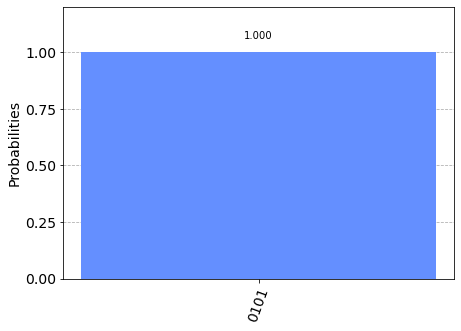

In [13]:
qc.measure_all()
result = execute(qc,backend=qasm_sim).result()
counts = result.get_counts()
plot_histogram(counts)

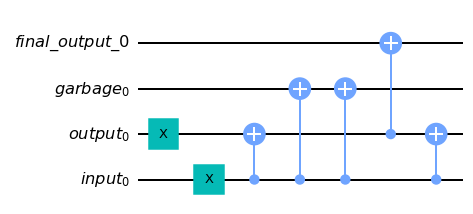

In [14]:
qc = QuantumCircuit(input_bit,output_bit,garbage_bit,final_output_bit)
qc.x([0,1])
qc = qc + Vf.inverse() + copy + Vf
qc = qc.reverse_bits()

qc.draw('mpl',justify='none')

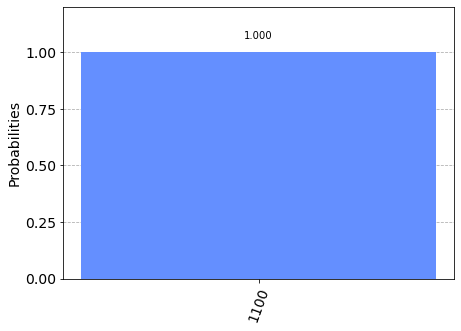

In [15]:
qc.measure_all()
result = execute(qc,backend=qasm_sim).result()
counts = result.get_counts()
plot_histogram(counts)

The results agree with the explanation. When the 'output' is initialized as $|1\rangle$, the answer obtained in final_output is the opposite of the correct output.

In [16]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}